<a href="https://colab.research.google.com/github/Nyota-Lab/movies/blob/Features/Dise%C3%B1o_de_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import warnings
#warnings.simplefilter("ignore")

In [0]:
#importamos nuestras librerias
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [0]:
#algunos tipos de regresion son mas interpretables que otros, por ejemplo la regresion Lasso
#cargamos nuestros datos siempre
x = pd.read_csv(r'C:\Users\willi\Documents\Programacion\ML\x.csv')
#volvemos a generar los conjuntos 'x' y 'y'
y = x['worldwide_gross']
X = x.drop(['worldwide_gross','gross'], axis=1)
X

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5
...,...,...,...,...,...,...,...
4099,7000.0,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0
4100,7000.0,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3
4101,7000.0,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8
4102,3967.0,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3


In [0]:
#importamos nuestro modelo de regresion
from sklearn.linear_model import Lasso
model = Lasso()

In [0]:
#dividimos nuestra informacion en los conjuntos de entrenamiento y de prueba, por defecto se hace al 75%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [0]:
#volvemos a entrenar a nuestro modelo de regresion lineal
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
model.score(X_test,y_test)

0.5859982976276366

In [0]:
#ahora vamos a ver cada una de las features que se usaron para la regresion lineal
model.coef_

array([ 3.07209933e+00, -7.38353717e+04, -6.31517048e+06,  5.34120649e+04,
        2.79186012e+01, -1.07690567e-02,  2.81555802e+07])

In [0]:
#np.floor nos da la parte entera
#np.log10 nos da el logaritmo en base 10 de un número lo cual es util cuando hay valores en distintas dimensiones
#np.abs nos da los valores absolutos de un numero
var = np.floor(np.log10(np.abs(model.coef_)))
var

array([ 0.,  4.,  6.,  4.,  1., -2.,  7.])

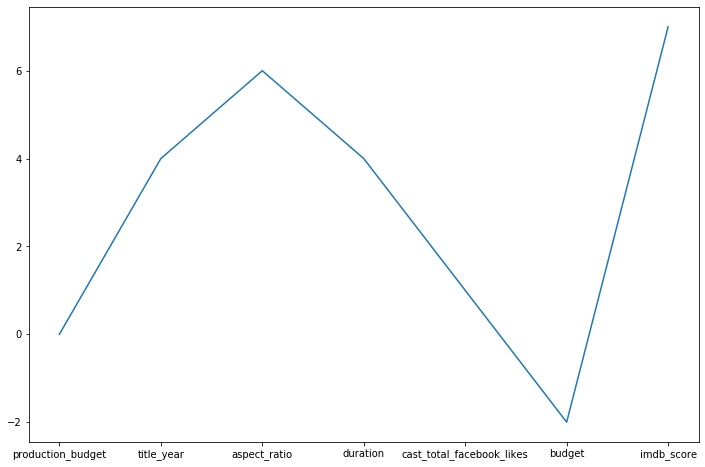

In [0]:
#para verlo de una mejor manera vamos a graficar la importancia de nuestras features
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(var)
#le ponemos los nombres al eje x
plt.xticks(np.arange(7),list(X.columns));

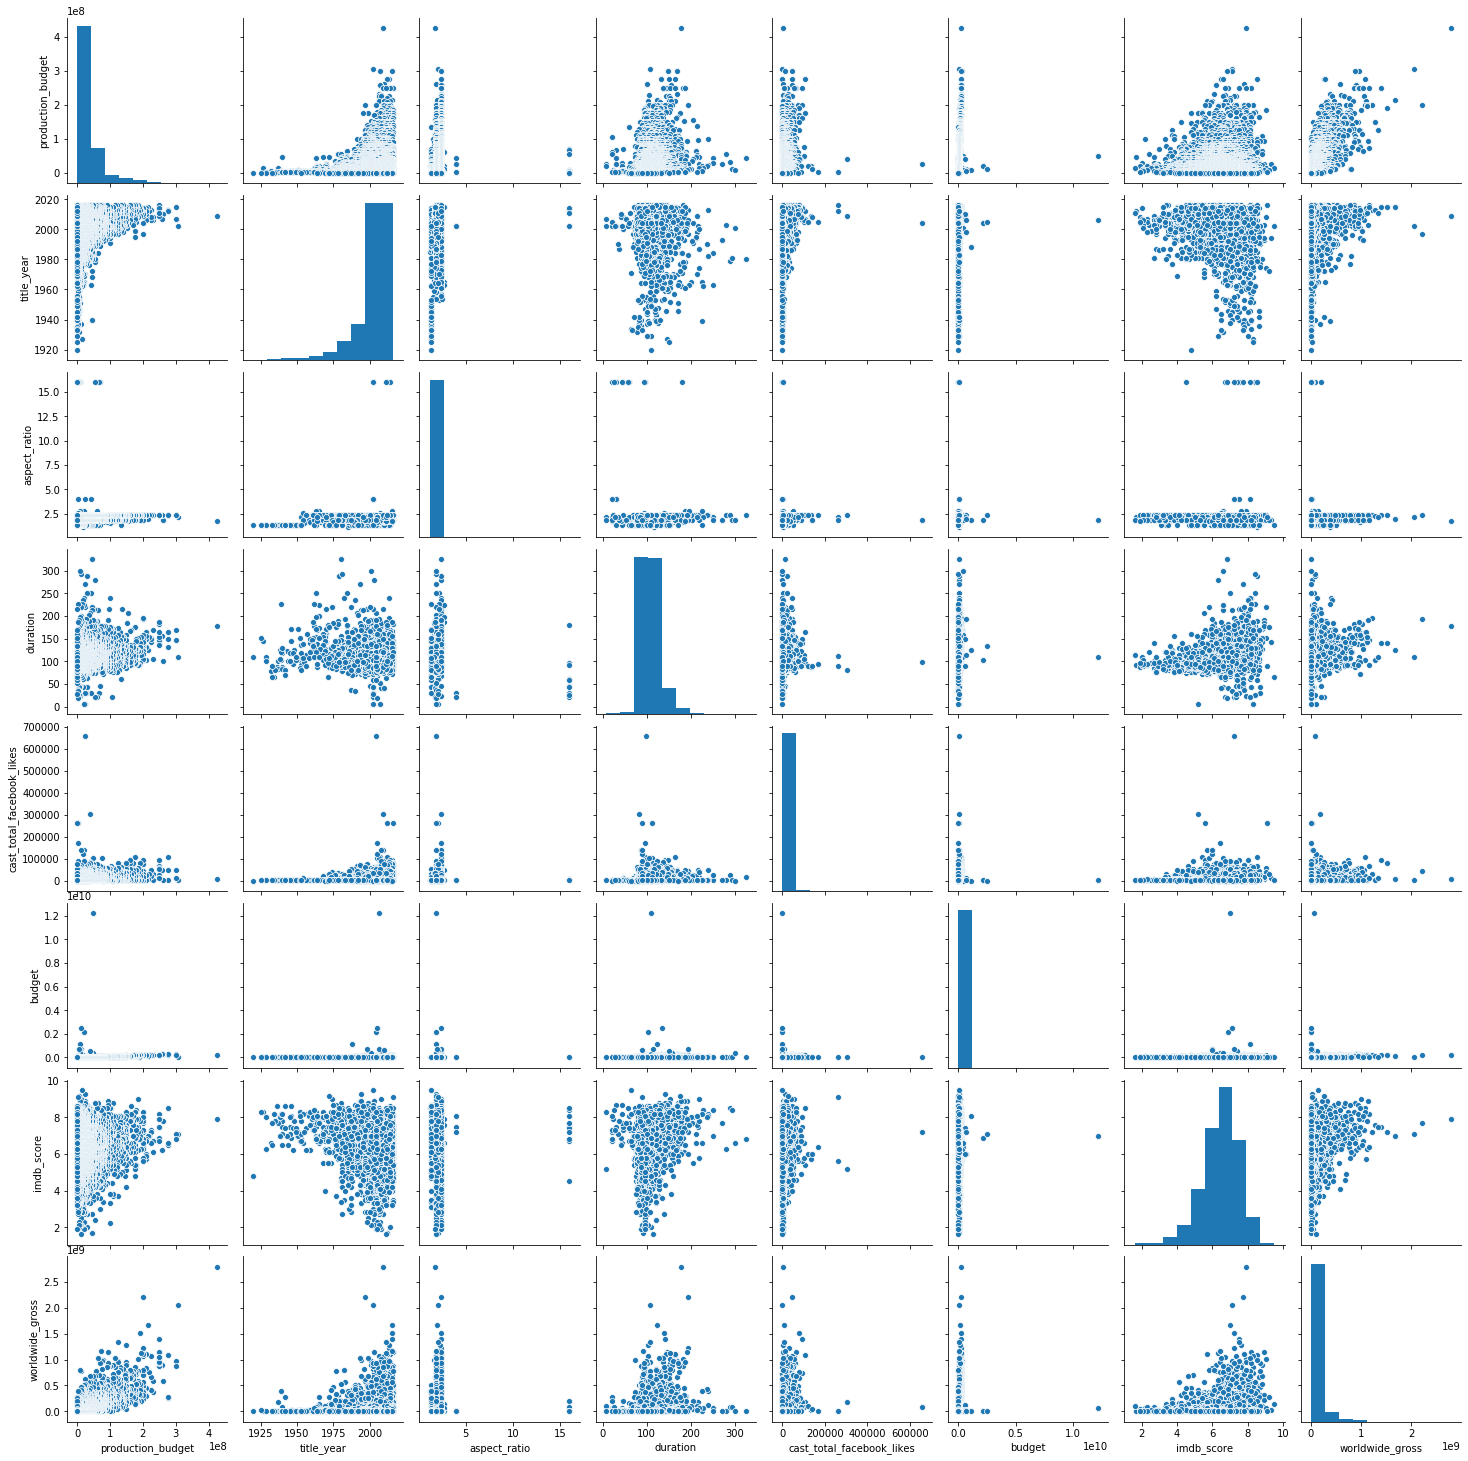

In [0]:
#entonces podemos ver que hay features muy importantes y otras que no tanto por lo cual en nuestro dataframe
#para este caso ni budget ni gross parecen ser las mas importantes
import seaborn as sns
z = pd.concat([X,y],axis=1)
sns.pairplot(z)

In [0]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
z2 = pd.concat([X,clase],axis=1)

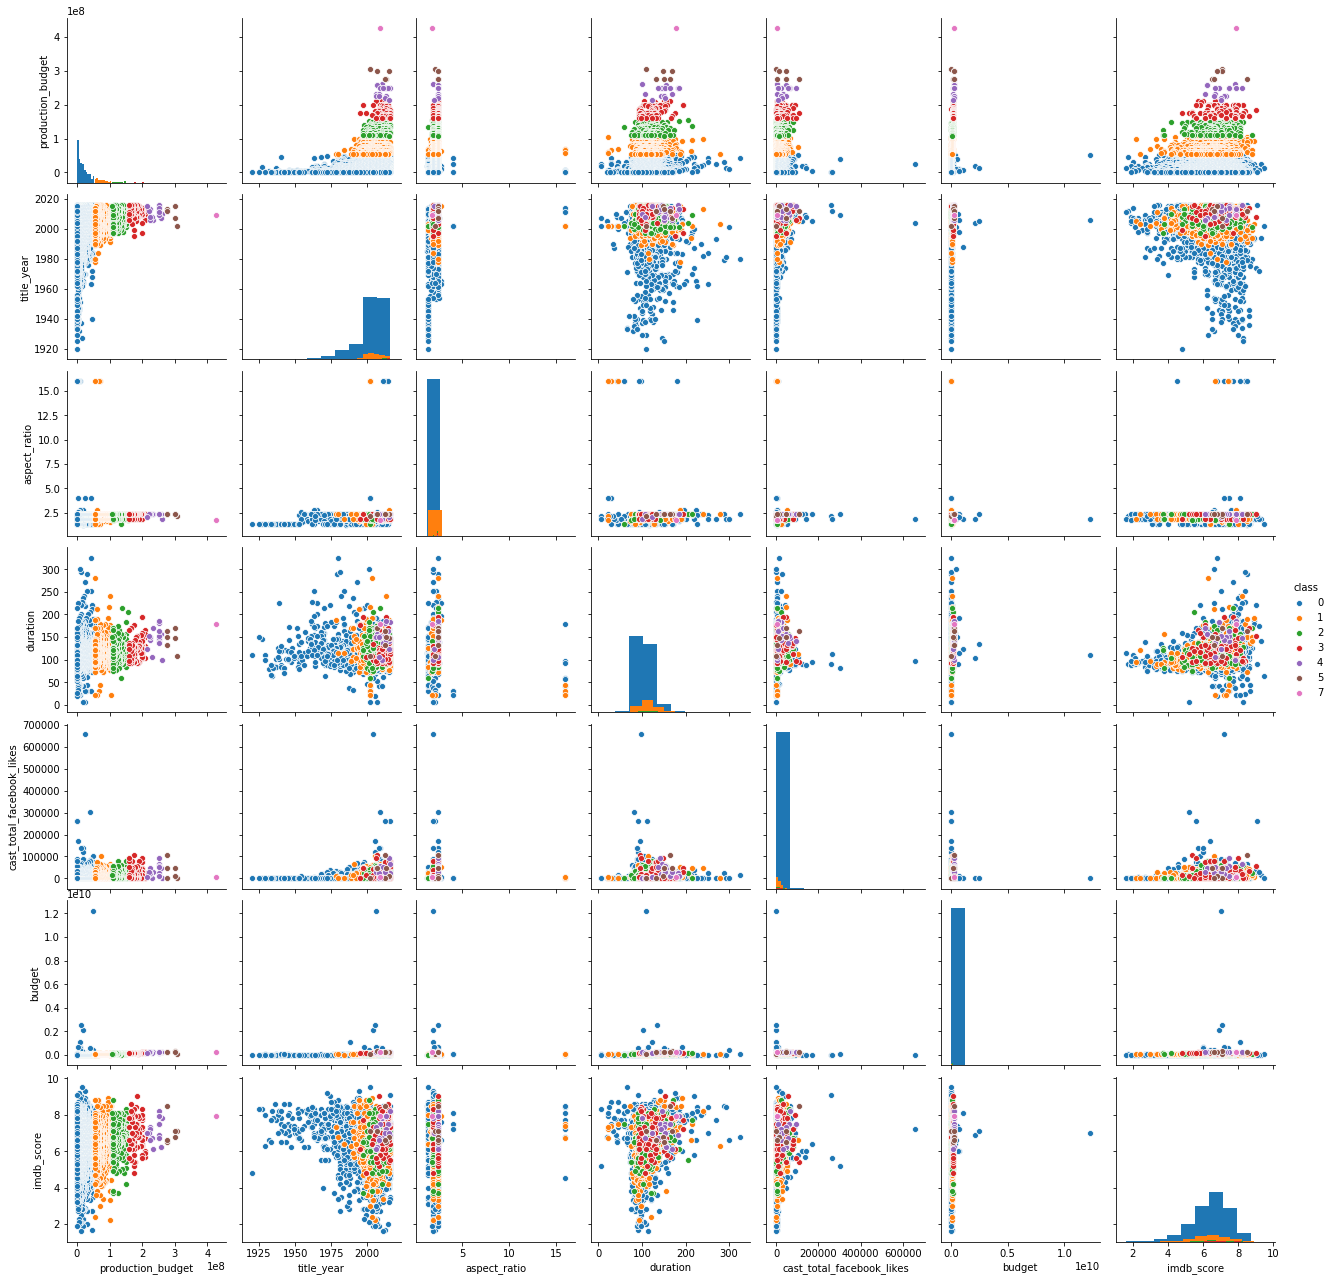

In [0]:
sns.pairplot(z2, hue = 'class',diag_kind='hist')

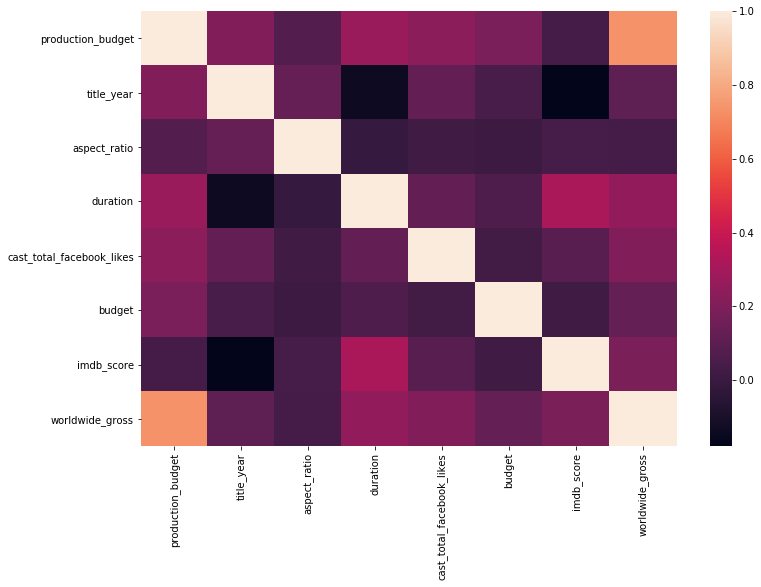

In [0]:
z3 = pd.concat([X,y],axis=1)
sns.heatmap(z3.corr())

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x0000022344A07318>)

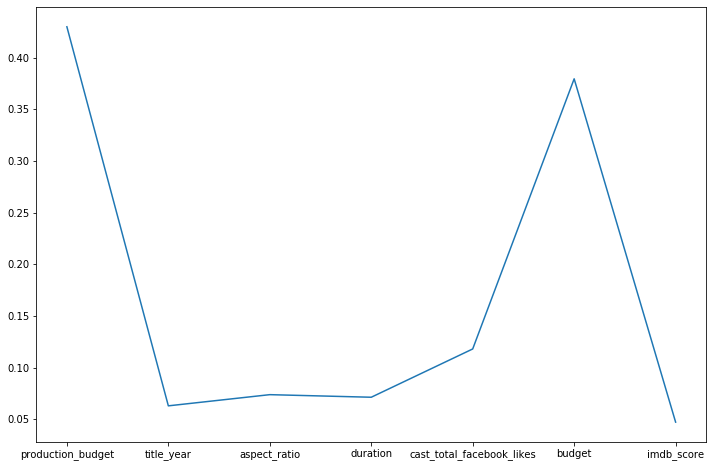

In [0]:
scores = selector.scores_
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7),list(X.columns));
